# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_names = ["Flipper Length (mm)"]
target_name = "Body Mass (g)"
data, target = penguins[feature_names], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the statistical performance on the testing set in terms of mean
absolute error.

In [3]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=3)
rf.fit(data_train, target_train)
y_pred = rf.predict(data_test)
print(f'MAE: {mean_absolute_error(y_pred, target_test):0.02f} g')

MAE: 366.03 g


The next steps of this exercise are to:

- create a new dataset containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a scatter plot;
- plot the decision of each individual tree by predicting on the newly
  created dataset;
- plot the decision of the random forest using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

In [25]:
# Write your code here.
import matplotlib.pyplot as plt
import seaborn as sns

sub_penguins = penguins[(penguins["Flipper Length (mm)"]>=170) & (penguins["Flipper Length (mm)"]<=230)]
sub_penguins.sort_values(by='Flipper Length (mm)', inplace=True)

<ipython-input-25-dad2fd89c042>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_penguins.sort_values(by='Flipper Length (mm)', inplace=True)


estimator0
estimator1
estimator2


<ipython-input-34-c3e0b1f180e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_penguins['rf_predict']=rf.predict(sub_penguins["Flipper Length (mm)"].to_numpy().reshape(-1,1))
<ipython-input-34-c3e0b1f180e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_penguins['estimator'+str(idx)] = estimator.predict(sub_penguins["Flipper Length (mm)"].to_numpy().reshape(-1,1))
<ipython-input-34-c3e0b1f180e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

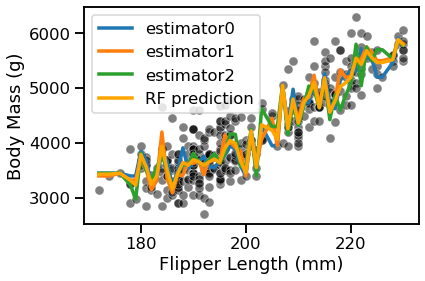

In [34]:
sns.scatterplot(x="Flipper Length (mm)", y="Body Mass (g)", data=sub_penguins, color='black', alpha=0.5)
sub_penguins['rf_predict']=rf.predict(sub_penguins["Flipper Length (mm)"].to_numpy().reshape(-1,1))
for idx, estimator in enumerate(rf.estimators_):
    print('estimator'+str(idx))
    sub_penguins['estimator'+str(idx)] = estimator.predict(sub_penguins["Flipper Length (mm)"].to_numpy().reshape(-1,1))
    plt.plot(sub_penguins["Flipper Length (mm)"], sub_penguins['estimator'+str(idx)],  label='estimator'+str(idx))
    

plt.plot(sub_penguins["Flipper Length (mm)"], sub_penguins["rf_predict"],  label='RF prediction', color= 'orange')
plt.legend()
plt.show();